In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])
df=Data[['RF','MKT']].copy()
Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RF                647 non-null    float64
 1   MKT               647 non-null    float64
 2   USA30yearGovBond  647 non-null    float64
 3   EmergingMarkets   647 non-null    float64
 4   WorldxUSA         647 non-null    float64
 5   WorldxUSAGovBond  646 non-null    float64
dtypes: float64(6)
memory usage: 35.4 KB


# The Capital Allocation Line: Adding the Risk-free rate




* So far we looked at an investor that is fully invested across risky assets

* In this case, the only way that an investor can change the risk profile of her portfolio is by changing the relative weights across the risky assets

* In practice investors can invest in the risk-free asset, which has zero volatility. 

* This means that they can potentially derisk their portfolio by keeping the relative weights across assets constant and simply invest more in the risk-free asset

* So we will now work with excess returns (which we study in Notebook 3) and the risk-free rate, separating cleaning the risk-free component of these risky asset returns

**Constructing excess returns**

In [2]:
# here are the excess returns Re=R-rf
Re=(Data[['RF','MKT','WorldxUSA']]).subtract(Data['RF'],axis='index').drop('RF',axis=1)

Re.tail()

,MKT,WorldxUSA
Date,,
2016-08-31,0.0050,0.000638
2016-09-30,0.0025,0.012536
2016-10-31,-0.0202,-0.020583
2016-11-30,0.0486,-0.019898
2016-12-31,0.0182,0.034083


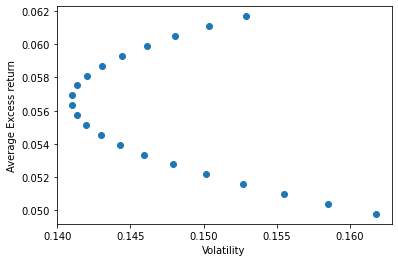

In [3]:
UsW=[]
w=np.arange(0,1.05,0.05)
for x in w:
    W=np.array([x,1-x])
    UsW.append([1-x,(W.T @ Re.cov() @ W*12)**0.5,W.T @ np.array(Re.mean())*12])
UsW=np.array(UsW)
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average Excess return')
# plt.ylim([0,0.062])
# plt.xlim([0,0.17])
plt.show()

> Why not compute the covariance matrix including the risk-free asset?



    

**Adding the Risk-free Rate**

construct vector of weights

x determines composition of risky portfolio (x in the US market, 1-x in international market)

just as above

And xf determines allocation between riks-free and risky-portfolio (xf in the riskfree and 1-xf on the risky portfolio)

In [4]:

w=np.arange(0,1.1,0.1)
wf=np.arange(0,1.1,0.1)
print(w)
print(wf)
# choosing some risk-free rate

rf=1/100/12

# I am settign to 1% per year. Divide by 100 to put in percent as the return data
# and divided by 12 to make it monthly as the return data

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
UsW=[]
for xf in wf:
    for x in w:
        #construct risky portfolio
        W=np.array([x,1-x])
        #variance of risky portfolio
        varW=W.T @ Re.cov() @ W
        # variance of final portfolio
        var=(1-xf)**2*(varW)
        #expected excess return of risky portfolio
        erW=(W.T @ np.array(Re.mean()))
        # expected return of finanl portfolio 
        er=(W.T @ np.array(Re.mean()))*(1-xf)+rf
        UsW.append([xf,1-x,var**0.5,er])


Note that the expected return term is `+rf` instead of `+rf*xf` because we are using excess return instead of return. To better understand, we write out the expected return in the following way where $RW$ below is the return on the risky portfolio

$
\begin{align}
E[r_p]&=x_f \times R_f + (1-x_f) \times E[R_W] \\
&= x_f \times r_f + (1-x_f) \times E[(R_W-r_f)] + (1-x_f) \times r_f \\
&= (1-x_f) \times E[(R_W-r_f)] + r_f \\
&=(1-x_f) \times E[R_W^e] + r_f
\end{align}
$



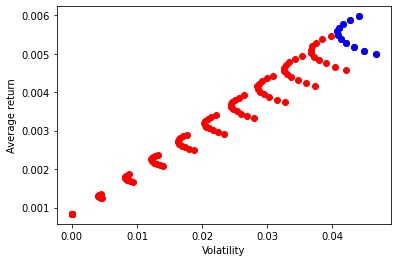

In [6]:
UsW=np.array(UsW)
plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[UsW[:,0]==0,2],UsW[UsW[:,0]==0,3],color='blue')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

* blue is the xf=0 case, where the portfolios is fully invested in the risky-portfolio

* How to read this plot? Say you want a portoflio with at most 0.03 monthly volatility. What does this plot tell you?

* Which units are this? Can you convert it to annual units? How?

* what is noteworthy about the shape of these different curves?

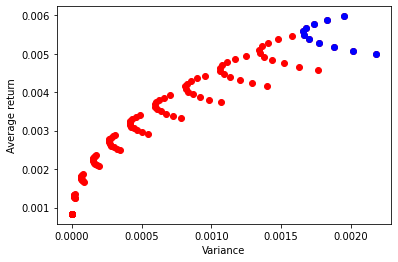

In [7]:
# in "variance space"

plt.scatter(UsW[:,2]**2,UsW[:,3],color='red')
plt.scatter(UsW[0:11,2]**2,UsW[0:11,3],color='blue')
plt.xlabel('Variance')
plt.ylabel('Average return')

plt.show()

* It is clear that someone that would like a lower risk profile can achieve this objective through the use of the risk-free asset without impacting expected returns as much

* What about investors that would like to take more risk, can they benefit of the risk-free asset?

* yes, if they can borrow at the risk-free rate

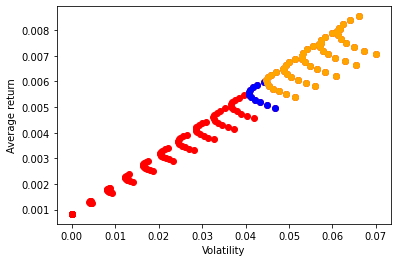

In [8]:
UsW=[]
w=np.arange(0,1.1,0.1)
wf=np.arange(0,1.1,0.1)

for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W)**0.5,(W.T @ np.array(Re.mean()))*(1-xf)+rf])

w=np.arange(0,1.1,0.1)
wf=np.arange(-0.5,0,0.1)

for xf in wf:
    for x in w:
        W=np.array([x,1-x])
        UsW.append([xf,1-x,(1-xf)*(W.T @ Re.cov() @ W)**0.5,(W.T @ np.array(Re.mean()))*(1-xf)+rf])
        
        
UsW=np.array(UsW)

plt.scatter(UsW[:,2],UsW[:,3],color='red')
plt.scatter(UsW[UsW[:,0]==0,2],UsW[UsW[:,0]==0,3],color='blue')
plt.scatter(UsW[UsW[:,0]<0,2],UsW[UsW[:,0]<0,3],color='orange')
plt.xlabel('Volatility')
plt.ylabel('Average return')

plt.show()

* What is the intepretation of a negative $w_f$? Doe it make sense?

* What is the interpretation of a $w_f$ above 1? Does it make sense?

* Is the investors likely to be able to borrow at the risk-free rate?